<a href="https://colab.research.google.com/github/junsu122/AI_Basic/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88/%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%97%AD%EC%A0%84%ED%8C%8C_%ED%99%9C%EC%84%B1%ED%99%94%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드 및 전처리
iris = load_iris()
X, y = iris.data, iris.target

# 데이터 스케일링 (신경망 학습 성능 향상)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습용/테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tensor 변환
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# 2. 신경망 모델 설계
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 16) # 입력층(4) -> 은닉층(16)
        self.relu = nn.ReLU()       # 활성화 함수
        self.fc2 = nn.Linear(16, 3) # 은닉층(16) -> 출력층(3)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = IrisNet()

# 3. 손실함수(CrossEntropy)와 최적화(Adam) 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. 모델 학습
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()  # 역전파
    optimizer.step() # 가중치 업데이트

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

# 5. 결과 평가
with torch.no_grad():
    predicts = model(X_test)
    _, predicted_classes = torch.max(predicts, 1)
    accuracy = (predicted_classes == y_test).sum().item() / len(y_test)
    print(f'\n최종 테스트 정확도: {accuracy * 100:.2f}%')

Epoch [20/100], Loss: 0.4099
Epoch [40/100], Loss: 0.2099
Epoch [60/100], Loss: 0.1186
Epoch [80/100], Loss: 0.0795
Epoch [100/100], Loss: 0.0636

최종 테스트 정확도: 100.00%


--- 실제값 vs 예측값 비교 (10개 샘플) ---
실제: versicolor | 예측: versicolor [✅]
실제: setosa | 예측: setosa [✅]
실제: virginica | 예측: virginica [✅]
실제: versicolor | 예측: versicolor [✅]
실제: versicolor | 예측: versicolor [✅]
실제: setosa | 예측: setosa [✅]
실제: versicolor | 예측: versicolor [✅]
실제: virginica | 예측: virginica [✅]
실제: versicolor | 예측: versicolor [✅]
실제: versicolor | 예측: versicolor [✅]


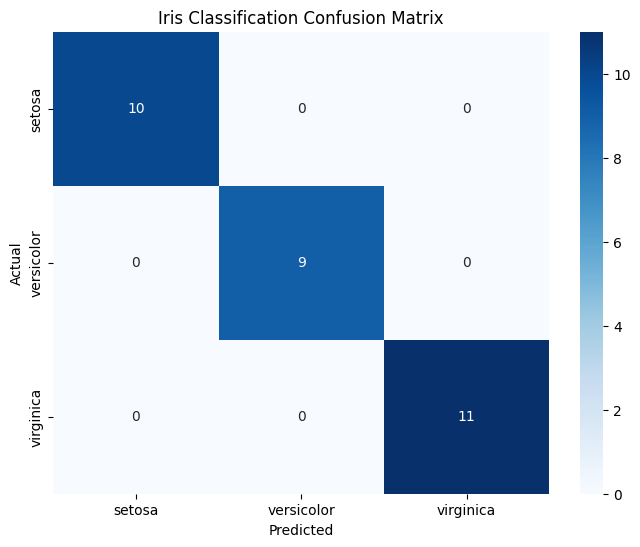


--- 종합 성능 리포트 ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. 테스트 데이터로 예측 수행
model.eval() # 모델을 평가 모드로 전환
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1) # 가장 높은 확률을 가진 클래스 선택

# 2. 실제값과 예측값 직접 비교 (샘플 10개)
print("--- 실제값 vs 예측값 비교 (10개 샘플) ---")
target_names = iris.target_names
for i in range(10):
    actual = target_names[y_test[i]]
    pred = target_names[predicted[i]]
    status = "✅" if actual == pred else "❌"
    print(f"실제: {actual} | 예측: {pred} [{status}]")

# 3. 혼동 행렬(Confusion Matrix) 시각화
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Iris Classification Confusion Matrix')
plt.show()

# 4. 종합 평가 지표 출력
print("\n--- 종합 성능 리포트 ---")
print(classification_report(y_test, predicted, target_names=target_names))